In [2]:
import pandas as pd
import numpy as np
import sklearn

In [3]:
# 'bdp' stands for "bank-data-partial" --> refers to partial bank data, i.e. first, smaller dataset.

bdp = pd.read_csv('bank.csv', sep=';', index_col=False)
bdp.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

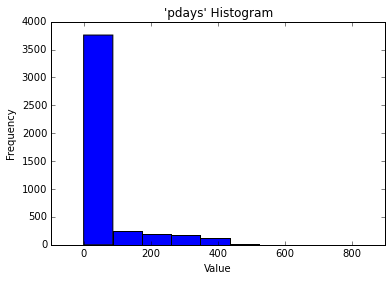

In [5]:
# Plot histogram for 'pdays', whose response structure I don't quite get, despite reading documentation.

plt.hist(bdp['pdays'])
plt.title("'pdays' Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# Why doesn't histogram show "-1" values for 'pdays'?

In [6]:
# Count up # of values for 'poutcome' by response type.

bdp.poutcome.value_counts()

# Why the huge number of 'unknown' values? on the other hand, the key value tells us what we ...
#... need to know anyways.

unknown    3705
failure     490
other       197
success     129
dtype: int64

In [7]:
from sklearn import preprocessing, feature_extraction

#from sklearn.preprocessing import OneHotEncoder, LabelEncoder
#from sklearn.feature_extraction import DictVectorizer

In [8]:
#[In]: bdp.keys():
#[Out]: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 
#        'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

In [9]:
# 'bdp_categs' is a list of categorical variables for dataframe 'bdp'

bdp_categs = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

In [10]:
# 'categs_dict' is a dictionary of categorical variables, as made by loading 'bdp_categs'

#categs_dict = bdp[bdp_categs].to_dict(outtype='records')    <-- (PREVIOUSLY EXECUTED)

In [11]:
# Call LabelEncoder() & OneHotEncoder().

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Define LabelEncoder() as 'le'

le = LabelEncoder()

# Fit 'bdp_categs' (categorical variables) for bdp (dataframe of dataset) and then transform.

#bdp[bdp_categs] = le.fit_transform(bdp[bdp_categs])    <-- (PREVIOUSLY EXECUTED)

# Output result of attempted procedure immediately above.

#bdp    <-- (PREVIOUSLY EXECUTED)

# Nope, doesn't work too well - 'bad input shape' is pretty clear message.

In [18]:
# 2nd/3rd Attempt (overall) to apply LabelEncoder.fit_transform() to all columns in dataframe 'bdp'.

bdp.apply(le.fit_transform, axis=0).head(7)

# Unfortunately, le.fit_transform() was applied to all columns (axis=0), so numerical/continuous ...
# ..were transformed/encoded as well, which isn't good bc results aren't terribly useful.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,11,10,1,0,0,1475,0,0,0,18,10,75,0,0,0,3,0
1,14,7,1,1,0,2030,1,1,0,10,8,216,0,228,4,0,0
2,16,4,2,2,0,1303,1,0,0,15,0,181,0,219,1,0,0
3,11,4,1,2,0,1352,1,1,2,2,6,195,3,0,0,3,0
4,40,1,1,1,0,274,1,0,2,4,8,222,0,0,0,3,0
5,16,4,2,2,0,934,0,0,0,22,3,137,1,109,3,0,0
6,17,6,1,2,0,569,1,0,0,13,8,337,0,219,2,1,0


In [35]:
# Fit & transform 'job' column.
# 'enc_job' is the encoded form of bdp[job].

enc_job = le.fit_transform(bdp.job)
enc_job

array([10,  7,  4, ...,  9,  1,  2])

In [37]:
# Look at unique values for 'enc_job' (which is encoded version of 'bdp[job]').

np.unique(enc_job)

# Looks ok so far.

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [38]:
bdp_categs

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [41]:
# Apply template procedure from 'enc_job" operation to other categorical variables.

enc_marital = le.fit_transform(bdp.marital)
enc_education = le.fit_transform(bdp.education)
enc_default = le.fit_transform(bdp.default)
enc_housing = le.fit_transform(bdp.housing)
enc_loan = le.fit_transform(bdp.loan)
enc_contact = le.fit_transform(bdp.contact)
enc_month = le.fit_transform(bdp.month)
enc_poutcome = le.fit_transform(bdp.poutcome)
enc_y = le.fit_transform(bdp.y)

In [42]:
enc_marital

array([1, 1, 2, ..., 1, 1, 2])

In [43]:
np.unique(enc_marital)

array([0, 1, 2])

In [44]:
enc_y

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
np.unique(enc_y)

array([0, 1])

In [ ]:
# Try creating a function to apply only to categorical variables ('bdp_categs') by using iterable (?)